# DACON Wine
Kaggle wine에서는 마땅한 데이터 셋을 찾지 못해서.. DACON의 Wine 데이터 셋을 이용  
[데이터 셋 출처](https://dacon.io/competitions/open/235610/data)

### Classification - Decision Tree
### 사용 라이브러리

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Data Load

In [9]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.shape, test.shape

((5497, 14), (1000, 13))

### 범주형 데이터 수치형 데이터로 변경하기
`type`의 경우 범주형 데이터이므로 수치형 데이터로 전환함  
`white=1`, `red=0`


In [10]:
# train
temp = pd.get_dummies(train["type"], drop_first=True)
train = pd.concat([train, temp], axis=1).copy()
train.drop(columns="type", inplace=True)

In [12]:
# test
temp = pd.get_dummies(test["type"], drop_first=True)
test = pd.concat([test, temp], axis=1).copy()
test.drop(columns="type", inplace=True)

### Train - Decision Tress

In [14]:
label_name = "quality"

features_names = train.columns.tolist()
features_names.remove("index")
features_names.remove(label_name)

In [15]:
label_name

'quality'

In [16]:
features_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'white']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[label_name], test_size=0.2)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (4397, 12)
y_train: (4397,)
X_test: (1100, 12)
y_test: (1100,)


In [19]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

pred_dt = model_dt.predict(X_test)

In [21]:
accuracy_score(pred_dt, y_test)

0.6263636363636363

### 모델 분석

In [22]:
model_dt.feature_importances_

array([0.07645187, 0.10895668, 0.07826502, 0.07037229, 0.09394712,
       0.08058928, 0.09386156, 0.06874854, 0.08844622, 0.09886493,
       0.1408196 , 0.00067688])

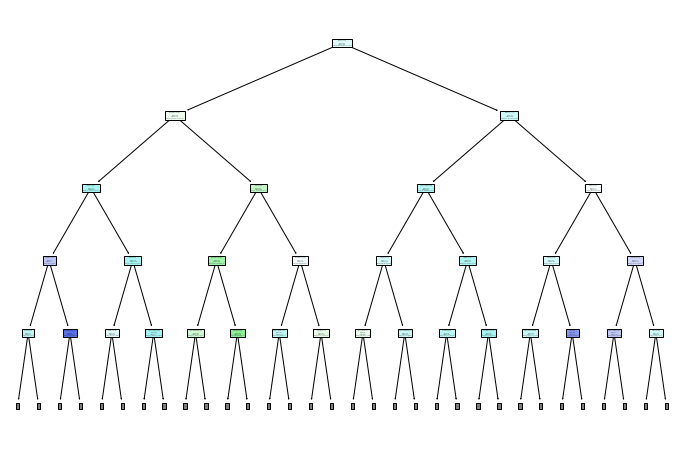

In [26]:
plt.figure(figsize=(12, 8))
_ = plot_tree(model_dt, max_depth=4, feature_names=features_names, filled=True)
plt.show()

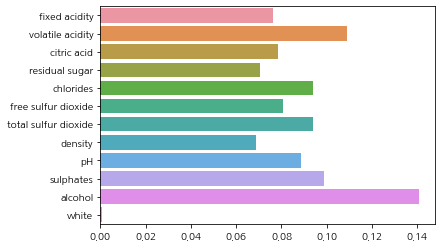

In [27]:
_ = sns.barplot(x=model_dt.feature_importances_, y=model_dt.feature_names_in_)